<a href="https://colab.research.google.com/github/sergio0623/programacion_para_la_analitica/blob/main/vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import io
from io import StringIO
import numpy as np

In [29]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white(1).txt to winequality-white(1) (1).txt


In [31]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.txt to winequality-red.txt


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

para este proyecto fueron necesarias la importacion de dos archivos csv nombradas por el tipo del color de cada vino (rojo,blanco)


aqui vamos a hacer toda la normalizacion normal de ambas bases de datos para saber exactamente se va a analizar


In [30]:
wines=pd.read_csv('winequality-white.txt', sep='\t')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
print(wines.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object


In [40]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,8.000000


In [42]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [44]:
wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.260823,-0.682978,0.183006,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.004727,0.234937,-0.260987,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.087716,-0.541904,0.312770,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.299130,-0.085652,0.005527,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.074407,-0.265026,0.371260,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.093724,0.070377,0.051658,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.038507,-0.066495,0.042947,-0.185100
density,0.260823,0.004727,0.087716,0.299130,0.074407,0.093724,0.038507,1.000000,-0.124970,0.048245,-0.025891
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.124970,1.000000,-0.196648,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.048245,-0.196648,1.000000,0.251397


In [33]:
wines1=pd.read_csv('winequality-red.txt', sep='\t')
wines1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
print(wines1.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object


In [41]:
wines1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,8.000000


In [43]:
wines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [45]:
#correlacion de la base de datos con los vinos rojos, dejando ver que como todos los datos son enteros o flotantes pueden correlacionarse como mejor quede para analizarlos
wines1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.260823,-0.682978,0.183006,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.004727,0.234937,-0.260987,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.087716,-0.541904,0.312770,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.299130,-0.085652,0.005527,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.074407,-0.265026,0.371260,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.093724,0.070377,0.051658,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.038507,-0.066495,0.042947,-0.185100
density,0.260823,0.004727,0.087716,0.299130,0.074407,0.093724,0.038507,1.000000,-0.124970,0.048245,-0.025891
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.124970,1.000000,-0.196648,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.048245,-0.196648,1.000000,0.251397


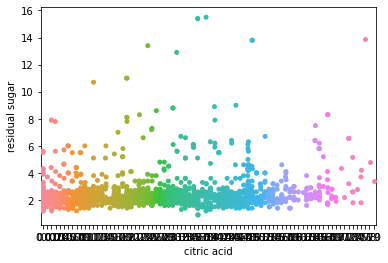

In [49]:
#en esta grafica se hace una comparacion entre el acido citrico y el azucar residual al hacer el tratamiento para cada vino dejando ver que la cantidad de acido citrico que se puede extraer en la produccion
#del vino es casi similar en la mayoria de los casos que se extrae el azucar que sobro.
sns.stripplot(data=wines, x="citric acid", y="residual sugar")

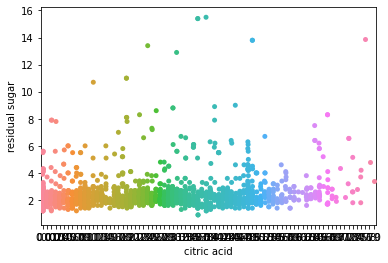

In [55]:
#segun lo anterior comparamos la otra prodcuccion la del vino 2 y vemos que es similar solo cambiando algunos datos que ya bajaron un poco a comparacion de la anterior
sns.stripplot(data=wines1, x="citric acid", y="residual sugar")

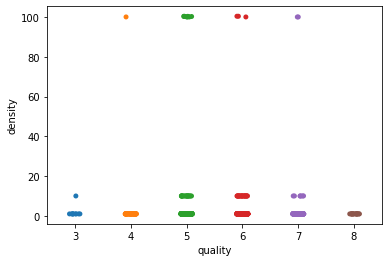

In [58]:
#aqui comparamos la calidad con la densidad para saber exactamente que con estos datos encontramos similitudes y hay cierta cantidad de datos que se observan que se alteraron en la calidad segun la densidad
#ya que afecto la produccion a tal punto de subir la densidad saliendose de los estandares normales
sns.stripplot(data=wines, x="quality", y="density")

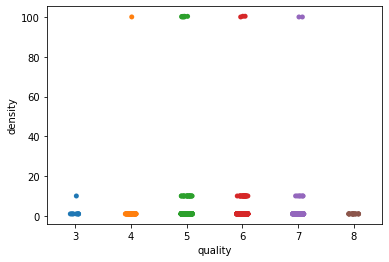

In [56]:
sns.stripplot(data=wines1, x="quality", y="density")

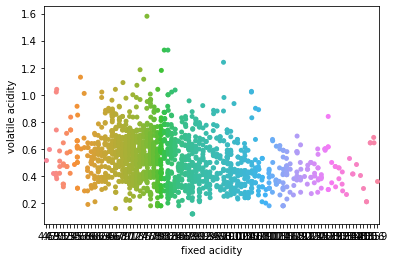

In [53]:
#con este grafico comparamos ante las dos producciones la acides fija y volatil viendo que entre estos dos datos esta muy ligada la una a la otra proporcioando la capacidad de definir a que categoria pertenece 
#el vino dejando entre ver si es seco, semiseco,dulce y espumoso segun la acides.
sns.stripplot(data=wines, x="fixed acidity", y="volatile acidity")

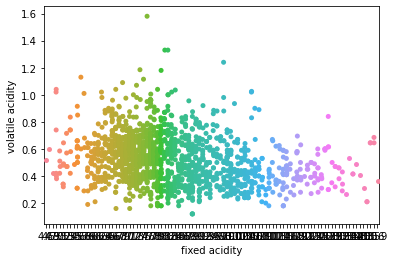

In [57]:
sns.stripplot(data=wines, x="fixed acidity", y="volatile acidity")

In [60]:
#ademas con este error entendemos para graficar como debe ser no podemos tomar valores negativos porque python no lo interpretara como de forma correcta.
sns.stripplot(data=wines, x="quality", y="dioxide")

ValueError: ignored